# Exploring Pandas' features throught the TED Talks dataset

In this tutorial, we will use the [TED Talks dataset](https://www.kaggle.com/rounakbanik/ted-talks), available from Kaggle Datasets under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

This tutorial is partially based on the [Data Science Best Practices with pandas](https://github.com/justmarkham/pycon-2019-tutorial) tutorial presented by Kevin Markham at PyCon2019 on May 2, 2019.

## Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Sometimes you need to know the pandas version you are using, for example, when you need to consult the pandas documentation. You get the pandas version with:

In [2]:
pd.__version__

'1.5.1'

## Load and examine the TED talks dataset

In [3]:
ted = pd.read_csv('data/ted.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

### Check for the presence of missing values

In [5]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Let's identify who are the speakers with missing occupation and if we can identify their occupation from other records (in case they gave more than one talk)

In [6]:
no_occupation_speakers = ted.loc[ted.speaker_occupation.isna(), 'main_speaker']

In [7]:
no_occupation_speakers = no_occupation_speakers.values.tolist()

In [8]:
no_occupation_speakers

['Sonaar Luthra',
 'Rick Falkvinge',
 'Gary Kovacs',
 'Ryan Holladay',
 'Brian Dettmer',
 'Boniface Mwangi']

In [9]:
ted.loc[ted.main_speaker.apply(lambda s: s in no_occupation_speakers),:].shape

(6, 17)

Unfortunately, there are no additional records that could be used to fill the missing occupation values.

### Transform filming date and publication date into datetime columns

Examine a sample of film_date and published_date values

In [10]:
ted.loc[:,['film_date', 'published_date']].sample(5)

,film_date,published_date
2034,1432771200,1440687602
1462,1362096000,1363963799
858,1286668800,1296149280
1399,1345680000,1355414450
2454,1478304000,1495119518


Note that both dates are given as *Unix epoch time*, that is, the number of seconds that have elapsed since January 1, 1970. 

For more about epoch time, see: [https://www.epochconverter.com/](https://www.epochconverter.com/)

Let's start by transforming the film_date into the datetime type

In [11]:
try:
    ted['filming_date'] = pd.to_datetime(ted['film_date'], unit='s')
except ValueError as err:
    print(err)

In [12]:
ted.filming_date.head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: filming_date, dtype: datetime64[ns]

Then, do the same for the published_date

In [13]:
ted['publication_date'] = pd.to_datetime(ted['published_date'], unit='s')

In [14]:
ted.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,filming_date,publication_date
1739,95,When General Stanley McChrystal started fighti...,404,TED2014,1395273600,30,Stanley McChrystal,Stanley McChrystal: The military case for shar...,1,1399474919,"[{'id': 10, 'name': 'Inspiring', 'count': 129}...","[{'id': 1112, 'hero': 'https://pe.tedcdn.com/i...",Military leader,"['Surveillance', 'collaboration', 'iraq', 'mil...",The military case for sharing knowledge,https://www.ted.com/talks/stanley_mcchrystal_t...,991694,2014-03-20,2014-05-07 15:01:59
980,316,Economics writer Tim Harford studies complex s...,1087,TEDGlobal 2011,1310515200,34,Tim Harford,"Tim Harford: Trial, error and the God complex",1,1310725320,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 1126, 'hero': 'https://pe.tedcdn.com/i...","Economist, journalist and broadcaster","['business', 'creativity', 'culture', 'society']","Trial, error and the God complex",https://www.ted.com/talks/tim_harford,1734555,2011-07-13,2011-07-15 10:22:00
402,223,"Athlete, actor and activist Aimee Mullins talk...",598,TED2009,1233792000,42,Aimee Mullins,Aimee Mullins: My 12 pairs of legs,1,1236733200,"[{'id': 9, 'name': 'Ingenious', 'count': 199},...","[{'id': 443, 'hero': 'https://pe.tedcdn.com/im...",Athlete and actor,"['activism', 'design', 'fashion', 'future', 'p...",My 12 pairs of legs,https://www.ted.com/talks/aimee_mullins_prosth...,3472415,2009-02-05,2009-03-11 01:00:00
2302,24,Who says change needs to be hard? Organization...,801,TED@BCG Paris,1463529600,23,Jim Hemerling,Jim Hemerling: 5 ways to lead in an era of con...,1,1476371324,"[{'id': 1, 'name': 'Beautiful', 'count': 104},...","[{'id': 2547, 'hero': 'https://pe.tedcdn.com/i...",Organizational change expert,"['business', 'collaboration', 'communication',...",5 ways to lead in an era of constant change,https://www.ted.com/talks/jim_hemerling_5_ways...,1811178,2016-05-18,2016-10-13 15:08:44
1725,182,Astronomers believe that every star in the gal...,398,TED2014,1395187200,28,Jeremy Kasdin,Jeremy Kasdin: The flower-shaped starshade tha...,1,1397746861,"[{'id': 10, 'name': 'Inspiring', 'count': 259}...","[{'id': 551, 'hero': 'https://pe.tedcdn.com/im...",Planet finder,"['Planets', 'astronomy', 'science', 'space', '...",The flower-shaped starshade that might help us...,https://www.ted.com/talks/jeremy_kasdin_the_fl...,1276015,2014-03-19,2014-04-17 15:01:01


### Drop columns that are no longer needed

In [15]:
ted.drop(columns=['film_date', 'published_date'], inplace=True)

In [16]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'views', 'filming_date',
       'publication_date'],
      dtype='object')

### How to change columns' names? 

The most flexible method for renaming columns is the `rename()` method. One should pass it a dictionary in which the keys are the old column names, while the values are the new names, and specify the axis to be 'columns'.

For example, rename columns 'comments' and 'views' to 'comment_count' and 'view_count', respectively

In [17]:
ted = ted.rename({'comments':'comment_count', 'views':'view_count'}, axis='columns')

In [18]:
ted.columns

Index(['comment_count', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'view_count',
       'filming_date', 'publication_date'],
      dtype='object')

## Task 1: Compute and plot the number of talks that took place each year

To do this, we need to extract the year from the filming date, and group talks on the year basis.

First, add the event_year column

In [19]:
ted['event_year'] = ted['filming_date'].dt.year
ted[['filming_date', 'event_year']].head()

,filming_date,event_year
0,2006-02-25,2006
1,2006-02-25,2006
2,2006-02-24,2006
3,2006-02-26,2006
4,2006-02-22,2006


Then, compute the number of talks per year

In [20]:
ted.event_year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2004     33
2003     33
2002     27
1998      6
2001      5
1983      1
1972      1
1990      1
1994      1
1984      1
1991      1
Name: event_year, dtype: int64

Note that the counts are by default sorted in descending order of count value. This is fine if we are interested in identifying years with the highest / lowest number of talks. <br>
However, if we want to plot the number of talks per year, we need the talk counts ordered based on the year. To get that, we can do the sort based on the index:

In [21]:
talks_per_year = ted.event_year.value_counts()
talks_per_year.sort_index(inplace=True)

In [22]:
talks_per_year

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: event_year, dtype: int64

Now, we can plot talk counts across years

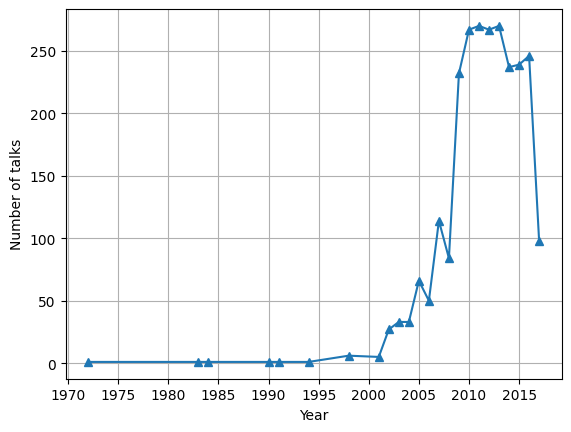

In [23]:
x = talks_per_year.index
y = talks_per_year.values

_, ax = plt.subplots()
ax.plot(x, y, marker='^')
ax.set_ylabel("Number of talks")
ax.set_xlabel("Year")
ax.set_xticks(range(1970, 2018, 5))

plt.grid(True)
plt.show()

## Task 2: Which TED events attracted the most attention?

Consider the number of views as a proxy of an event's attractiveness

In [24]:
ted.head(4)

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,url,view_count,filming_date,publication_date,event_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006-06-27 00:11:00,2006


Since the number of recorded TED talks vary from one TED event to the next, to estimate the attention that a TED event received it wouldn't be fair to compute the total number of views per talk. Hence, we will compute the average number of views per talk during each event.

In [25]:
ted.groupby('event').view_count.mean().sort_values(ascending=False)

event
TEDxPuget Sound           34309432.0
TEDxHouston               16140250.5
TEDxBloomington            9484259.5
TEDxCreativeCoast          8444981.0
TEDxNorrkoping             6569493.0
                             ...    
TEDxNASA@SiliconValley      155895.0
AORN Congress               149818.0
TEDxWaterloo                138812.0
TEDxIslay                   120274.0
The Do Lectures             112321.0
Name: view_count, Length: 355, dtype: float64

It might be the case that some of these events got high mean views due to having a small number of very popular talks, or even just one very popular talk. So, consider also the number of talks at each event.

To aggregate data based on more than one function (e.g., in this case, mean and count), we can follow `groupby()` with the `agg()` function that receives a list of aggregation functions we want to apply to the grouped data.

In [26]:
ted.groupby('event').view_count.agg(['count', 'mean']).head()

,count,mean
event,,
AORN Congress,1,149818.0
Arbejdsglaede Live,1,971594.0
BBC TV,1,521974.0
Bowery Poetry Club,1,676741.0
Business Innovation Factory,3,304086.0


Let's store the results in a new data frame

In [27]:
events_views = ted.groupby('event').view_count.agg(['count', 'mean'])

In [28]:
events_views.columns = ['talk_count', 'mean_views']

Now, we can examine, for each event, both the average number of views and number of talks

In [29]:
events_views.sort_values(by='mean_views', ascending=False).head(10)

,talk_count,mean_views
event,,
TEDxPuget Sound,1,34309432.0
TEDxHouston,2,16140250.5
TEDxBloomington,2,9484259.5
TEDxCreativeCoast,1,8444981.0
TEDxNorrkoping,1,6569493.0
TEDxUW,1,5917201.0
TEDxLinnaeusUniversity,1,4984884.0
TEDxGoldenGatePark 2012,1,4811180.0
TEDxCHUV,1,4682458.0


Note that all top 10 events (based on the average views) had at most 2 talks. <br>
Let's check the stats for the number of talks and mean views per event

In [30]:
events_views.describe()

,talk_count,mean_views
count,355.000000,3.550000e+02
mean,7.183099,1.527689e+06
std,15.265735,2.205832e+06
min,1.000000,1.123210e+05
25%,1.000000,7.594215e+05
50%,2.000000,1.187105e+06
75%,5.000000,1.715774e+06
max,84.000000,3.430943e+07


To get some further insights, let's consider only those events with above average number of talks. Considering highly skewed distribution, we'll use median as the average value

In [31]:
avg_talk_cnt = events_views.describe().loc['50%', 'talk_count']

In [32]:
events_views.loc[events_views.talk_count > avg_talk_cnt, :].sort_values(by='mean_views', ascending=False)

,talk_count,mean_views
event,,
TED Talks Education,8,4.375104e+06
TEDGlobal>Geneva,11,3.385408e+06
TED2006,45,3.274345e+06
TEDxManhattanBeach,3,3.251704e+06
TEDSalon NY2013,11,2.861639e+06
...,...,...
TEDxYYC,3,3.699607e+05
Business Innovation Factory,3,3.040860e+05
TEDxPhoenix,4,2.846855e+05


## Task 3: Explore talks based on their ratings

Take a closer look at a sample of ratings

In [33]:
ted.ratings.sample(5)

1436    [{'id': 24, 'name': 'Persuasive', 'count': 120...
1647    [{'id': 10, 'name': 'Inspiring', 'count': 164}...
2242    [{'id': 1, 'name': 'Beautiful', 'count': 331},...
38      [{'id': 7, 'name': 'Funny', 'count': 80}, {'id...
703     [{'id': 24, 'name': 'Persuasive', 'count': 519...
Name: ratings, dtype: object

In [34]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

Even though a 'ratings' value looks like a list, it is not

In [35]:
type(ted.ratings[0])

str

To convert talk ratings into a list - so that they can be further processed - we will use a function from the Python's `ast` (*Abstract Syntax Tree*) module:

`literal_eval()` function allows one to evaluate a string containing a Python literal or container, that is, it can be used to transform a string into a literal value, a list, a tuple or any other container object

In [36]:
import ast

ast.literal_eval('(1,2,3,4)')

(1, 2, 3, 4)

In [37]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [38]:
type(ast.literal_eval(ted.ratings[0]))

list

Create a new column for storing ratings as a list, instead of a string.

To that end, we will use the `apply()` f. to apply the `ast.literal_eval()` f. to each value of the ratings column

In [39]:
ted['ratings_list'] = ted.ratings.apply(ast.literal_eval)

In [40]:
ted.ratings_list.head(3)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
Name: ratings_list, dtype: object

### Task 3.1: For each talk, find the 3 most frequent ratings

Add a column with a tuple comprising names of the 3 most frequent ratings for the corresponding talk

To do this, we can start from the 'ratings_list' column

In [41]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

One way to approach this task is to create a function that receives a list of ratings for one talk and returns a tuple with the 3 most frequent ratings

In [42]:
def most_freq_ratings(ratings):
    sorted_ratings = sorted(ratings, key=lambda rating: rating['count'], reverse=True)
    return tuple([rating['name'] for rating in sorted_ratings[:3]])

In [43]:
most_freq_ratings(ted.ratings_list[0])

('Inspiring', 'Funny', 'Persuasive')

Now, apply the function to the `ratings` of each talk to create a new column (e.g. top3_ratings)

In [44]:
ted['top3_ratings'] = ted.ratings_list.apply(most_freq_ratings)

Print 'top3_ratings' of the 10 most viewed talks to see what were the primary ways of ratings those talks

In [45]:
ted.sort_values(by='view_count', ascending=False)[['name','top3_ratings']].head(10)

,name,top3_ratings
0,Ken Robinson: Do schools kill creativity?,"(Inspiring, Funny, Persuasive)"
1346,Amy Cuddy: Your body language may shape who yo...,"(Inspiring, Fascinating, Informative)"
677,Simon Sinek: How great leaders inspire action,"(Inspiring, Persuasive, Fascinating)"
837,Brené Brown: The power of vulnerability,"(Inspiring, Courageous, Beautiful)"
452,Mary Roach: 10 things you didn't know about or...,"(Funny, Informative, Fascinating)"
1776,Julian Treasure: How to speak so that people w...,"(Informative, Inspiring, Persuasive)"
201,Jill Bolte Taylor: My stroke of insight,"(Inspiring, Fascinating, Jaw-dropping)"
5,Tony Robbins: Why we do what we do,"(Inspiring, Persuasive, Fascinating)"
2114,James Veitch: This is what happens when you re...,"(Funny, Ingenious, Fascinating)"
1416,Cameron Russell: Looks aren't everything. Beli...,"(Courageous, Inspiring, Informative)"


### Task 3.2 Which TED events had the most 'Jaw-dropping' talks?

This task can be interpreted in different ways. One way is that we qualify a talk as *jaw-dropping* if 'Jaw dropping' ratings were among the top 3 most frequent kind of ratings for that talk.

Let's start by creating the *jaw-dropping* column, as qualified above

In [46]:
is_jaw_dropping = lambda ratings: any([r.lower()=='jaw-dropping' for r in ratings])

ted['jaw_dropping'] = ted.top3_ratings.apply(is_jaw_dropping)

Note the selection based on a condition expressed as a function of column (top3_ratings) values

Take a sample of jaw dropping talks and check that 'Jaw-dropping' is really among the top 3 ratings

In [47]:
ted.loc[ted.jaw_dropping, ['top3_ratings']].sample(10)

,top3_ratings
1063,"(Jaw-dropping, Fascinating, Courageous)"
1649,"(Inspiring, Courageous, Jaw-dropping)"
4,"(Informative, Fascinating, Jaw-dropping)"
583,"(Fascinating, Informative, Jaw-dropping)"
1292,"(Fascinating, Jaw-dropping, Inspiring)"
1742,"(Informative, Persuasive, Jaw-dropping)"
228,"(Informative, Persuasive, Jaw-dropping)"
1286,"(Informative, Fascinating, Jaw-dropping)"
230,"(Fascinating, Inspiring, Jaw-dropping)"
215,"(Ingenious, Jaw-dropping, Fascinating)"


To answer the posed question, we can now simply group talks per event and compute the sum and mean of the jaw_dropping column - this will give as the number and proportion, respectively, of jaw-dropping talks per event

In [48]:
ted.groupby('event').jaw_dropping.agg(['sum', 'mean']).sort_values(by="sum", ascending=False)

,sum,mean
event,,
TED2007,17,0.250000
TED2009,16,0.192771
TED2013,14,0.181818
TED2008,11,0.192982
TED2011,10,0.142857
...,...,...
TEDxABQ,0,0.000000
TEDYouth 2015,0,0.000000
TEDYouth 2014,0,0.000000


### Task 3.3 Compute the number of positive, negative, and neutral ratings, then add one column for each of these counts

This practically means that we should add 3 columns - pos_ratings, neg_ratings, neutral_ratings - with the corresponding rating counts.

We will achieve this through a multistep process:

1) Identify different kinds of rating categories that have been used to characterise talks and classify them as positive, negative, or neutral

2) Create a function for computing the number of ratings in each of the 3 groups (positive, negative, neutral)

3) Add a column - ratings_counts - storing the computed values as tuples of the form (pos_ratings, neg_ratings, neutral_ratings)

4) Transform the ratings_counts column into 3 columns: pos_ratings, neg_ratings, neutral_ratings 

**Step 1.1**: Identify different kinds of rating categories and store them a set (e.g. rating_categories_set)

In [49]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [50]:
rating_categories_set = set()
for ratings in ted.ratings_list:
    for rating_dict in ratings:
        rating_categories_set.add(rating_dict['name'])

rating_categories_set

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

**Step 1.2**: Classify rating categories as positive, negative, or neutral

In [51]:
negative = {'Confusing','Longwinded', 'Obnoxious', 'Unconvincing'}
neutral = {'OK'}
positive = rating_categories_set - (negative | neutral)

In [52]:
positive

{'Beautiful',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Persuasive'}

In [53]:
(positive | neutral | negative) == rating_categories_set

True

**Step 2**: Create a function that computes the number of ratings in each of the 3 classes and returns the result as a tuple of the form: (positive, negative, neutral)

In [54]:
def pos_neg_neutral_ratings_count(ratings):
    from collections import defaultdict
    counts_dict = defaultdict(int)
    for rating in ratings:
        if rating['name'] in positive:
            counts_dict['positive'] += rating['count']
        elif rating['name'] in negative:
            counts_dict['negative'] += rating['count']
        else:
            counts_dict['neutral'] += rating['count']
    return tuple(counts_dict.values())

In [55]:
pos_neg_neutral_ratings_count(ted.ratings_list[0])

(91538, 1138, 1174)

**Step 3**: Add a column - *ratings_counts* - storing the output of the above function applied to the `ratings` column

In [56]:
ted['ratings_counts'] = ted.ratings_list.apply(pos_neg_neutral_ratings_count)

In [57]:
ted.head(3)

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,title,url,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,jaw_dropping,ratings_counts
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)",False,"(91538, 1138, 1174)"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)",False,"(2169, 564, 203)"
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)",False,"(2327, 351, 146)"


**Step 4.1**: Transform the *ratings_counts* column into a data frame with 3 columns: pos_ratings, neg_ratings, neutral_ratings

To that end, we can `apply()` the Series constructor on the *ratings_counts* column

In [58]:
ted_ratings = ted.ratings_counts.apply(pd.Series)
ted_ratings.head()

,0,1,2
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


In [59]:
ted_ratings.columns = ['pos_ratings', 'neg_ratings', 'neutral_ratings']
ted_ratings.head()

,pos_ratings,neg_ratings,neutral_ratings
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


**Step 4.2**: Merge this new data frame with the original one (ted); this can be done using the `concat()` function. The auxiliary column - ratings_counts - can be dropped as it is no longer needed

In [60]:
ted.drop(columns='ratings_counts', inplace=True)

In [61]:
ted = pd.concat([ted, ted_ratings], axis=1)

In [62]:
ted.head()

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,jaw_dropping,pos_ratings,neg_ratings,neutral_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)",False,91538,1138,1174
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)",False,2169,564,203
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)",False,2327,351,146
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",...,1697550,2006-02-26,2006-06-27 00:11:00,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","(Inspiring, Courageous, Persuasive)",False,3487,156,85
4,593,You've never seen data presented like this. Wi...,1190,TED2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",...,12005869,2006-02-22,2006-06-27 20:38:00,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","(Informative, Fascinating, Jaw-dropping)",True,25062,310,248


### Task 3.4 Find speakers with the highest average number of positive ratings per talk

We need to group talks based on the 'main_speaker' column and, for each group, compute mean value of the pos_ratings column

In [63]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.mean()

In [64]:
avg_pos_rating_per_speaker.sort_values(ascending=False).head(10)

main_speaker
Jill Bolte Taylor    68436.00
Amy Cuddy            63814.00
Steve Jobs           36664.00
Brené Brown          36572.00
Shawn Achor          31692.00
Ken Robinson         30361.75
Susan Cain           29095.00
Pranav Mistry        26292.00
Guy Winch            24204.00
Benjamin Zander      23300.00
Name: pos_ratings, dtype: float64

To answer this more thoroughly, we'll consider also the number of talks that a speaker gave

In [65]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.agg(['mean', 'count'])
avg_pos_rating_per_speaker.head(7)

,mean,count
main_speaker,,
OK Go,43.0,1
Rodrigo y Gabriela,1103.0,1
Silk Road Ensemble,149.0,1
Sofi Tukker,18.0,1
AJ Jacobs,1705.0,3
Aakash Odedra,752.0,1
Aala El-Khani,690.0,1


In [66]:
avg_pos_rating_per_speaker.columns = ['avg_pos_rating', 'talk_count']
avg_pos_rating_per_speaker.sort_values(by='avg_pos_rating', ascending=False).head(10)

,avg_pos_rating,talk_count
main_speaker,,
Jill Bolte Taylor,68436.00,1
Amy Cuddy,63814.00,1
Steve Jobs,36664.00,1
Brené Brown,36572.00,2
Shawn Achor,31692.00,1
Ken Robinson,30361.75,4
Susan Cain,29095.00,1
Pranav Mistry,26292.00,1
Guy Winch,24204.00,1


Identify the top 10 speakers among those who gave more than 1 talk

In [67]:
freq_speakers = avg_pos_rating_per_speaker.loc[avg_pos_rating_per_speaker.talk_count > 1]
freq_speakers.sort_values(by='avg_pos_rating', ascending=False).head(10)

,avg_pos_rating,talk_count
main_speaker,,
Brené Brown,36572.000000,2
Ken Robinson,30361.750000,4
Chimamanda Ngozi Adichie,15429.000000,2
Elizabeth Gilbert,14049.500000,2
David Gallo,10895.333333,3
Esther Perel,9948.500000,2
Dan Gilbert,9529.000000,3
Andrew Solomon,9261.666667,3
Sarah Kay,8997.500000,2


### Task 3.5 Identify 10 speakers with the largest proportion of negative ratings 

Start by computing the proportion of negative ratings for all the talks

In [68]:
ted['prop_neg_ratings'] = ted.neg_ratings / (ted.neg_ratings + ted.pos_ratings + ted.neutral_ratings)

Group talks by the main_speaker and, for each group (that is, speaker), compute the average proportion of negative ratings and number of talks

In [69]:
prop_neg_rating_per_speaker = ted.groupby('main_speaker').prop_neg_ratings.agg(['mean', 'count'])
prop_neg_rating_per_speaker.sample(10)

,mean,count
main_speaker,,
"Christopher ""moot"" Poole""",0.080000,1
Ricardo Semler,0.011053,1
Adam Sadowsky,0.051724,1
Mariana Mazzucato,0.754058,1
David Grady,0.828074,1
Rick Falkvinge,0.075972,1
Andreas Ekström,0.036335,1
Larry Smith,0.873375,1
Carlo Ratti,0.111671,1


In [70]:
prop_neg_rating_per_speaker.columns = ['avg_prop_neg_ratings', 'talk_count']
prop_neg_rating_per_speaker.sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
JK Rowling,0.977841,1
Christopher Bell,0.969025,1
Ed Yong,0.968276,1
Andres Lozano,0.968137,1
Daan Roosegaarde,0.965812,1
Maurice Conti,0.963050,1
Theo E.J. Wilson,0.962264,1
Neil Harbisson,0.959244,1
Sandrine Thuret,0.958036,1


Maybe those with one talk just had a bad day or were not experienced enough... 
So, let's focus on speakers with 3+ talks

In [71]:
neg_rating_freq_speaker = prop_neg_rating_per_speaker[prop_neg_rating_per_speaker.talk_count > 3]
neg_rating_freq_speaker.sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
Steven Johnson,0.410903,4
Stefan Sagmeister,0.299194,4
Chris Anderson,0.278482,4
Ken Robinson,0.255495,4
Jonathan Haidt,0.251055,4
Stewart Brand,0.237354,4
Bill Gates,0.232409,5
Rives,0.211085,6
Jacqueline Novogratz,0.207155,5


It seems that those who gave more talks have lower proportion of negative ratings 

### Task 3.6 Which occupations deliver the funniest TED talks on average?

(Consider also how well represented occupations are)

We'll start by computing the number of Funny ratings per talk and storing the results in the (new) column 'funny_counts'

In [72]:
ted['funny_counts'] = ted.ratings_list.apply(lambda ratings: sum(rating['count'] for rating in ratings if rating['name'].lower() == 'funny'))

In [73]:
ted.loc[:,['ratings_list', 'funny_counts']].head(4)

,ratings_list,funny_counts
0,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",19645
1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",544
2,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",964
3,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",59


This may be fine, but absolute values tend to be misleading - it is often better to take relative values, that is, proportions. <br>
Therefore, instead of considering the funniest those talk with the highest absolute values of Funny ratings, better choose talks with the highest *proportion* of Funny ratings.

In [74]:
def funny_ratings_prop(ratings_list):
    funny_ratings_cnt = 0
    ratings_total = 0
    for rating_dict in ratings_list:
        ratings_total += rating_dict['count']
        if rating_dict['name'] == 'Funny': funny_ratings_cnt += rating_dict['count']
    return funny_ratings_cnt/ratings_total

In [75]:
ted['funny_prop'] = ted.funny_counts / (ted.pos_ratings + ted.neg_ratings + ted.neutral_ratings)
ted['funny_prop'].head()

0    0.209323
1    0.185286
2    0.341360
3    0.015826
4    0.054254
Name: funny_prop, dtype: float64

Let's examine absolute and relative counts of the top 10 fanniest talks based on the absolute counts. <br>(the idea is to see the difference of absolute vs relative counts)

In [76]:
ted.loc[:, ['funny_counts', 'funny_prop']].sort_values(by='funny_counts', ascending=False).head(10)

,funny_counts,funny_prop
0,19645,0.209323
2114,7731,0.625182
2161,7445,0.333722
1129,7315,0.227315
675,5552,0.527406
837,5225,0.086970
452,4166,0.369556
685,4025,0.702076
747,4013,0.630677
692,3000,0.139593


Next, do the grouping based on the speaker_occupation and compute, for each group (i.e., each occupation), average counts and proportions of Funny ratings

In [77]:
avg_fr_per_occupation = ted.groupby('speaker_occupation')[['funny_counts', 'funny_prop']].mean()
avg_fr_per_occupation

,funny_counts,funny_prop
speaker_occupation,,
Chairman of the Cordoba Initiative,0.0,0.000000
"Child protection leader, activist, author",1.0,0.002421
Robotics engineer,1.0,0.007353
Space physicist,19.0,0.015447
3D printer,18.0,0.007789
...,...,...
e-Patient,21.0,0.014374
"inventor, engineer",21.0,0.011745
medical inventor,8.0,0.002993


Take the top 10 occupations based on the average count of Funny ratings

In [78]:
avg_fr_per_occupation.sort_values(by='funny_counts', ascending=False).head(10)

,funny_counts,funny_prop
speaker_occupation,,
Author/educator,6190.0,0.142086
Comedian and writer,4970.5,0.602085
Blogger,3773.0,0.196885
"Actor, comedian, playwright",3254.5,0.558107
Vulnerability researcher,3088.0,0.075958
Comedian and writer,2779.0,0.256887
"Professor of Economics, University of Waterloo",1960.0,0.152541
Gentleman thief,1864.0,0.242456
"Author, blogger, entrepreneur",1856.0,0.193777


Now, do the same, but using average proportion of Funny ratings as the criterion

In [79]:
avg_fr_per_occupation.sort_values(by='funny_prop', ascending=False).head(10)

,funny_counts,funny_prop
speaker_occupation,,
Comedian and writer,4970.5,0.602085
Jugglers,1637.0,0.566828
"Actor, comedian, playwright",3254.5,0.558107
"Actor, writer",374.0,0.515152
Comedian,1839.0,0.512457
Satirist,600.0,0.512383
Cartoon editor,616.0,0.511628
"Comedian, voice artist",782.0,0.503542
Social energy entrepreneur,1423.0,0.502117


It seems that relative values serve as the better criterion for selecting occupations that delivered the funniest talks. So, we'll continue with the `funny_ratings_prop` values.<br>

Note that some occupations sound rather exotic and unique (e.g. "Gentleman thief", "Science humorist"). Let's also consider both the proportion of funny ratings and frequency of different occupations.

In [80]:
occupation_funny_ratings = ted.groupby('speaker_occupation')['funny_prop'].agg(['mean', 'count'])
occupation_funny_ratings.head(10)

,mean,count
speaker_occupation,,
Chairman of the Cordoba Initiative,0.000000,1
"Child protection leader, activist, author",0.002421,1
Robotics engineer,0.007353,1
Space physicist,0.015447,1
3D printer,0.007789,1
3D printing entrepreneur,0.006599,1
9/11 mothers,0.001733,1
A capella ensemble,0.035811,1
AI expert,0.080183,2


In [81]:
occupation_funny_ratings.columns = ["mean_prop_funny_ratings", "occupation_freq"]

Note that many occupations seem to appear only once. To verify this, let's compute some basic statistics for the occupation frequency

In [82]:
occupation_funny_ratings.occupation_freq.describe()

count    1458.000000
mean        1.744856
std         2.995889
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        45.000000
Name: occupation_freq, dtype: float64

The stats indicate that 75% of occupations appear only once in the dataset. Let's also consider higher percentiles:

In [83]:
occupation_funny_ratings.occupation_freq.quantile([0.8, 0.85, 0.9, 0.95])

0.80    2.0
0.85    2.0
0.90    3.0
0.95    4.0
Name: occupation_freq, dtype: float64

Only 5% of all occupations appear 4 or more times.
Since, we cannot make any conclusion about an occupation based on just one representative, let's consider those 5% or occupations that are somewhat more represented. To that end, select those with frequency > 95th percentile.

In [84]:
occupation_freq_95th_perc =  occupation_funny_ratings.occupation_freq.quantile(0.95)

In [85]:
freq_occupation_funny_ratings = occupation_funny_ratings.loc[occupation_funny_ratings.occupation_freq > occupation_freq_95th_perc,]

Let's see how many occupations we have selected as "well represented"

In [86]:
freq_occupation_funny_ratings.shape[0]

68


Finally, let's examine how funny are talks by the representatives of such occupations.

In [87]:
freq_occupation_funny_ratings.sort_values(by="mean_prop_funny_ratings", ascending=False)

,mean_prop_funny_ratings,occupation_freq
speaker_occupation,,
Comedian,0.512457,6
"Performance poet, multimedia artist",0.306468,6
Singer/songwriter,0.252205,9
Producer,0.202531,5
Data scientist,0.184076,5
...,...,...
Photographer,0.007152,25
Investor and advocate for moral leadership,0.005198,5
Photojournalist,0.004908,6


As expected, comedians gave the funniest talks. On the other hand, talks by physicians and surgeons, again, as expected, are the least funny. <br>
Something probably unexpected: data scientists got 5th place (among 68 occupations)

### Task 4. Examine the topics of the 100 best 'Inspiring' talks, present them in a tag cloud 

While talks can be ranked based on a variety of criteria, we will value and rank them based on the proportion of positive ratings

Let's start by creating a subset of talks that have the 'Inspiring' rating among the top 3 ratings

In [88]:
inspiring_talks = ted.loc[ted.top3_ratings.apply(lambda top3: 'inspiring' in [r.lower() for r in top3])].copy()

Note the call of the copy function at the end of the above line. This will allow us to alter the new dataframe (inspiring_talks) without inadvertently affecting the main (ted) dataframe.

In [89]:
inspiring_talks.shape

(1752, 27)

Next, order these talks based on the proportion of positive ratings and take top 100

In [90]:
inspiring_talks['pos_ratings_prop'] = inspiring_talks.pos_ratings / (inspiring_talks.pos_ratings \
                                                                     + inspiring_talks.neg_ratings \
                                                                     + inspiring_talks.neutral_ratings)

top100_inspiring_talks = inspiring_talks.sort_values(by='pos_ratings_prop', ascending=False).head(100)

To be able to access rows of this new data frame using regular indices (0,1,2,...), we need to reset its index

In [91]:
top100_inspiring_talks.index[:5]

Int64Index([2528, 2511, 2497, 2485, 2483], dtype='int64')

In [92]:
top100_inspiring_talks.reset_index(drop=True, inplace=True)
top100_inspiring_talks.index

RangeIndex(start=0, stop=100, step=1)

Next, let's examine tags associated with the inspiring talks

In [93]:
top100_inspiring_talks.tags.sample(5)

11    ['Blindness', 'brain', 'choice', 'fear', 'huma...
99    ['TEDx', 'design', 'health care', 'product des...
41    ['children', 'education', 'motivation', 'teach...
1     ['Criminal Justice', 'TEDx', 'United States', ...
60    ['code', 'creativity', 'drones', 'education', ...
Name: tags, dtype: object

It seems that tags of a particular talk are stored as a list. But, we should take a closer look...

In [94]:
top100_inspiring_talks.tags[0]

"['TEDx', 'ancient world', 'archaeology', 'conservation', 'culture', 'history', 'museums', 'photography', 'technology', 'terrorism', 'war']"

In [95]:
type(top100_inspiring_talks.tags[0])

str

Ratings are, in fact, encoded as a string... <br>
So, we (again) have to use `ast.literal_eval()` function to get a list out of a string (representation of the list)

In [96]:
top100_inspiring_talks['tags'] = top100_inspiring_talks.tags.apply(ast.literal_eval)

In [97]:
top100_inspiring_talks.tags[0]

['TEDx',
 'ancient world',
 'archaeology',
 'conservation',
 'culture',
 'history',
 'museums',
 'photography',
 'technology',
 'terrorism',
 'war']

In [98]:
type(top100_inspiring_talks.tags[0])

list

Next, we will create a dictionary of the tags that were used to describe the inspiring talks. Keys in this dictionary will be individual tags, while values will be frequencies of tags' occurrences in relation to the inspiring talks. We need this type of dictionary for the creation of a tag cloud.

In [99]:
from collections import defaultdict

inspiring_topics_dict = defaultdict(int)

for tags_list in top100_inspiring_talks.tags:
    for tag in tags_list:
        tag = tag.lower().replace(' ', '_') # this is not necessary
        inspiring_topics_dict[tag] += 1

How many unique tags were identified?

In [100]:
len(inspiring_topics_dict.keys())

226

How frequent those tags are? Compute some basic statistics that describe tag frequency distribution <br> 
This can be done using functions from the statistics module, but let's do it by creating and using pandas Series (for the sake of practicing pandas):

In [101]:
tag_freq_series = pd.Series(data=inspiring_topics_dict.values(), index=inspiring_topics_dict.keys())

In [102]:
tag_freq_series.head(10)

tedx             23
ancient_world     2
archaeology       1
conservation      2
culture          14
history           4
museums           1
photography       6
technology       13
terrorism         2
dtype: int64

In [103]:
tag_freq_series.describe()

count    226.000000
mean       3.654867
std        3.719665
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       23.000000
dtype: float64

Keep only tags with above average (median) frequency

In [104]:
mdn_freq = tag_freq_series.describe()['50%']

In [105]:
frequent_tags = tag_freq_series.loc[tag_freq_series > mdn_freq]

In [106]:
frequent_tags.head()

tedx           23
culture        14
history         4
photography     6
technology     13
dtype: int64

In [107]:
frequent_tags.shape

(106,)

Print 15 most frequent tags (and their frequencies)

In [108]:
frequent_tags.sort_values(ascending=False).head(15)

tedx               23
health             18
humanity           18
social_change      17
personal_growth    15
global_issues      15
culture            14
education          14
children           14
technology         13
science            13
community          12
society            12
health_care        12
design             11
dtype: int64

Now, we can create a word cloud

Some useful materials for word cloud: <br>
* [https://www.datacamp.com/community/tutorials/wordcloud-python](https://www.datacamp.com/community/tutorials/wordcloud-python) <br>
* [https://gist.github.com/izikeros/fca85e2d7b9eae3e0d9dec6a1f1635b3](https://gist.github.com/izikeros/fca85e2d7b9eae3e0d9dec6a1f1635b3) <br>


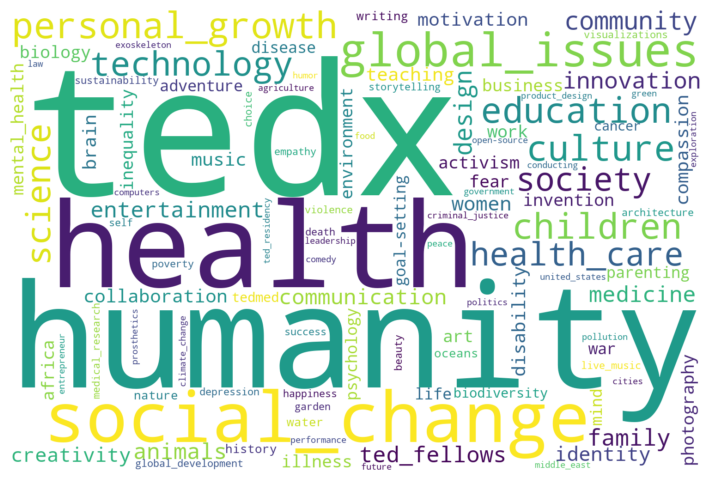

In [109]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(frequent_tags)

plt.figure(figsize=(9,6))

plt.imshow(wordcloud, interpolation='bilinear')
# Note: interpolation makes the figure smoother
# different interpolation options are given here:
# https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html


plt.axis('off')
plt.show()